In [1]:
#import all the necessary libraries

import pandas as pd
import numpy as np
import pandas as pd

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

### Importing the Dataframe

In [2]:
country = pd.read_csv(".\Country-data.csv")

### Let's understand the structure of our data

In [3]:
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
country.shape

(167, 10)

### Data Preparation

Let's begin with **checking for any null values** in our dataset

In [5]:
country.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

We can confirm that there are no missing values in the data

Let's **visuallize all the variables** in the dataset

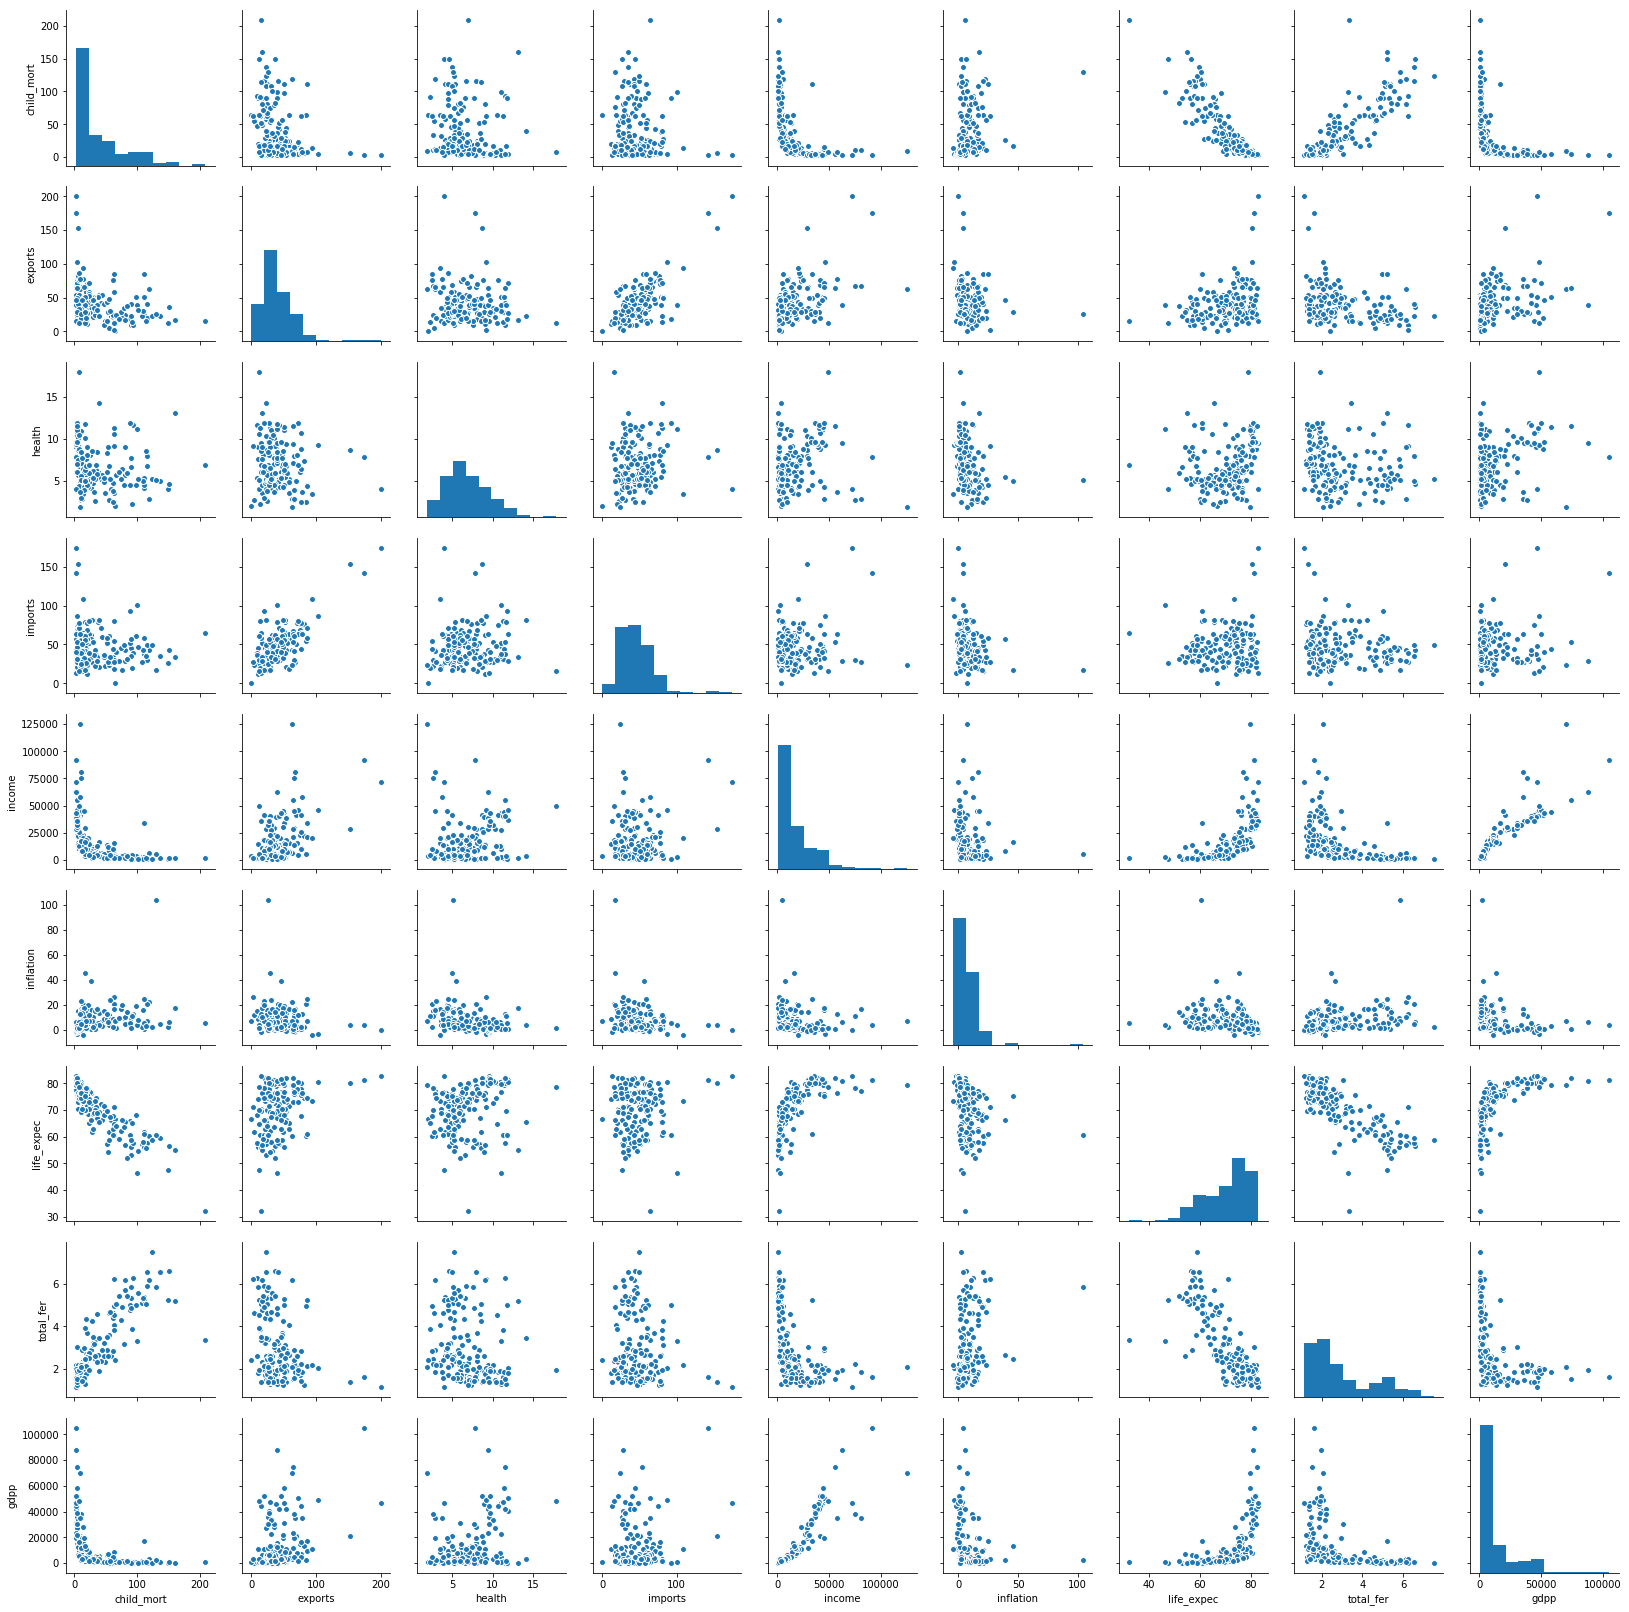

In [6]:
sns.pairplot(country[country.columns[1:]])
plt.show()

We see clear trends between variables. Let's go ahead and begin with our modelling process

### Feature Standardisation

In [7]:
# Normalising continuous features
df = country.drop('country', axis=1)

In [8]:
normalized_df=(df-df.mean())/df.std()
country_refined = country.copy()
country_refined = country_refined.drop(normalized_df.columns, 1)
country_refined = pd.concat([country_refined,normalized_df],axis=1)
#telecom.describe()[['tenure', 'MonthlyCharges']]

In [9]:
country_refined.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,1.287660,-1.134867,0.278251,-0.082208,-0.805822,0.156864,-1.614237,1.897176,-0.677143
1,Albania,-0.537333,-0.478220,-0.096725,0.070624,-0.374243,-0.311411,0.645924,-0.857394,-0.484167
2,Algeria,-0.272015,-0.098824,-0.963176,-0.639838,-0.220182,0.786908,0.668413,-0.038289,-0.463980
3,Angola,2.001787,0.773056,-1.443729,-0.164820,-0.583289,1.382894,-1.175698,2.121770,-0.514720
4,Antigua and Barbuda,-0.693548,0.160186,-0.286034,0.496076,0.101427,-0.599944,0.702147,-0.540321,-0.041692


In [10]:
country_refined.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02
mean,1.555642e-16,-3.478588e-16,-1.403069e-15,3.463630e-16,-7.445807e-17,1.329608e-17,3.616535e-16,1.728491e-17,2.393295e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-8.844782e-01,-1.495694e+00,-1.822346e+00,-1.934123e+00,-8.577462e-01,-1.134440e+00,-4.324181e+00,-1.187678e+00,-6.947112e-01
25%,-7.443802e-01,-6.314377e-01,-6.901350e-01,-6.894051e-01,-7.153045e-01,-5.649418e-01,-5.909802e-01,-7.616117e-01,-6.347506e-01
50%,-4.703834e-01,-2.228576e-01,-1.804579e-01,-1.482972e-01,-3.726872e-01,-2.262699e-01,2.860972e-01,-3.553621e-01,-4.530683e-01
75%,5.908894e-01,3.735962e-01,6.495875e-01,4.898797e-01,2.933547e-01,2.807919e-01,7.021467e-01,6.156736e-01,5.924283e-02
max,4.208640e+00,5.796402e+00,4.035299e+00,5.250390e+00,5.594716e+00,9.102343e+00,1.376822e+00,3.000326e+00,5.021405e+00


### Checking for outliers

Keeping in mind that our final aim is **to find countries in dire need of funding**, we will only be removing outliers that are influencing the data towards those countries that are wealthy/don't need funding. <br><br>
Therefore, the outlier analysis will be done such that we treat countries that have:
- extremely low values of child_mort
- extremely high values of exports
- extremely high values of health
- extremely low values of imports
- extremely high values of Income
- extremely low values of Inflation
- extremely high values of life_expec
- extremely low values of total_fer
- extremely high values of gdpp

Text(0.5,1,'GDP per Capita')

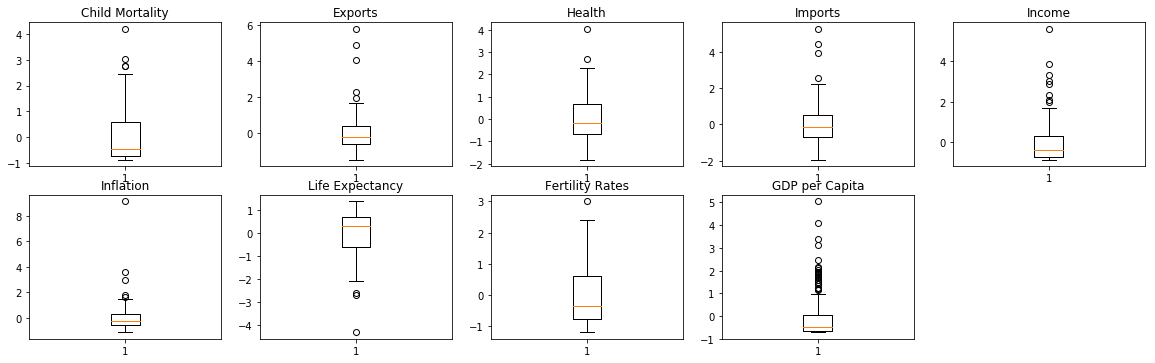

In [11]:
#Plotting boxplots for outlier identification for each variable
plt.figure(figsize=(20,9))
plt.subplot(3,5,1)
plt.boxplot(country_refined['child_mort'])
plt.title('Child Mortality')

plt.subplot(3,5,2)
plt.boxplot(country_refined['exports'])
plt.title('Exports')

plt.subplot(3,5,3)
plt.boxplot(country_refined['health'])
plt.title('Health')

plt.subplot(3,5,4)
plt.boxplot(country_refined['imports'])
plt.title('Imports')

plt.subplot(3,5,5)
plt.boxplot(country_refined['income'])
plt.title('Income')

plt.subplot(3,5,6)
plt.boxplot(country_refined['inflation'])
plt.title('Inflation')

plt.subplot(3,5,7)
plt.boxplot(country_refined['life_expec'])
plt.title('Life Expectancy')

plt.subplot(3,5,8)
plt.boxplot(country_refined['total_fer'])
plt.title('Fertility Rates')

plt.subplot(3,5,9)
plt.boxplot(country_refined['gdpp'])
plt.title('GDP per Capita')


In [12]:
## Let's perform Outlier Analysis
#country_refined.loc[country_refined['exports']>country_refined['exports'].quantile(0.9), 'country']
#country_refined.loc[country_refined['health']>country_refined['health'].quantile(0.9), 'country']
good_countries = country_refined.loc[(country_refined['health']>country_refined['health'].quantile(0.75))&(country_refined['gdpp']>country_refined['gdpp'].quantile(0.75))&
                    (country_refined['exports']>country_refined['exports'].quantile(0.75))&(country_refined['income']>country_refined['income'].quantile(0.75))
                    , 'country']
country_refined2 = country_refined.loc[~country_refined['country'].isin(good_countries)]

In [13]:
list(country_refined.loc[country_refined['country'].isin(good_countries), 'country'])

['Belgium',
 'Iceland',
 'Ireland',
 'Malta',
 'Netherlands',
 'Slovak Republic',
 'Slovenia',
 'Switzerland']

Text(0.5,1,'GDP per Capita')

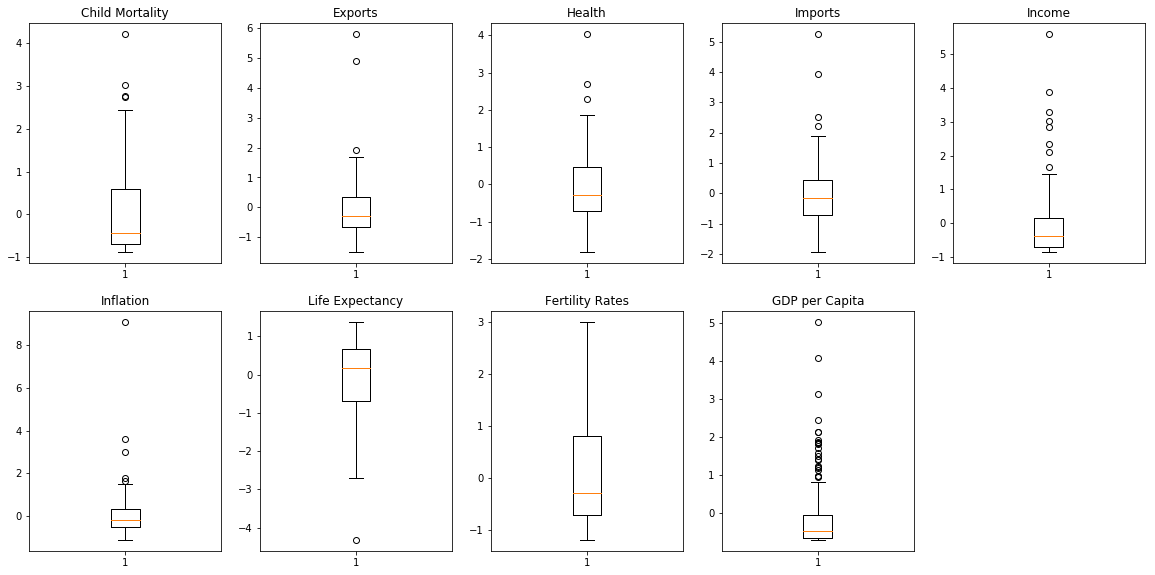

In [14]:
#Plotting boxplots for outlier identification for each variable
plt.figure(figsize=(20,15))
plt.subplot(3,5,1)
plt.boxplot(country_refined2['child_mort'])
plt.title('Child Mortality')

plt.subplot(3,5,2)
plt.boxplot(country_refined2['exports'])
plt.title('Exports')

plt.subplot(3,5,3)
plt.boxplot(country_refined2['health'])
plt.title('Health')

plt.subplot(3,5,4)
plt.boxplot(country_refined2['imports'])
plt.title('Imports')

plt.subplot(3,5,5)
plt.boxplot(country_refined2['income'])
plt.title('Income')

plt.subplot(3,5,6)
plt.boxplot(country_refined2['inflation'])
plt.title('Inflation')

plt.subplot(3,5,7)
plt.boxplot(country_refined2['life_expec'])
plt.title('Life Expectancy')

plt.subplot(3,5,8)
plt.boxplot(country_refined2['total_fer'])
plt.title('Fertility Rates')

plt.subplot(3,5,9)
plt.boxplot(country_refined2['gdpp'])
plt.title('GDP per Capita')


To develop a better understanding of the data, let's have a look at the multicollinearity that exists(if at all) in our dataset

In [15]:
country_refined2.shape

(159, 10)

### Checking for Multicollinearity

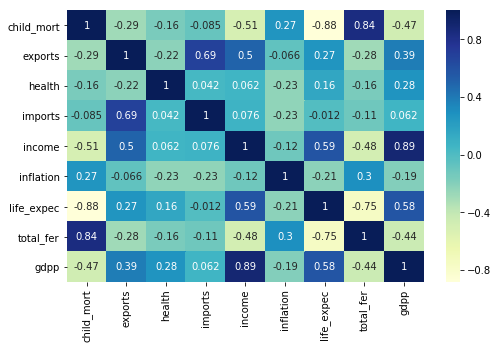

In [16]:
# Let's see the correlation matrix 
plt.figure(figsize = (8,5))        # Size of the figure
sns.heatmap(country_refined2.corr(),annot = True, cmap="YlGnBu")

We can see that there exists a lot of multicollinearity between the numerical variables in our dataset

Instead of eliminating any of these variables based on the correlation matrix, let's go ahead with the process of PCA to identify orthonormal principal components that would tackle the problem of multicollinearity while still maintaining the variance/information in the data intact

## Model Building

### Performing PCA on the dataset

In [17]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [18]:
# Split the dataframes for the names of the country and their numerical attributes
country_name = country_refined2[['country']]
country_attr = country_refined2.drop('country', axis=1)

In [19]:
#Doing the PCA on the attributes
pca.fit(country_attr)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

#### Let's plot the principal components and try to make sense of them
- We'll plot original features on the first 2 principal components as axes

In [20]:
pca.components_

array([[-0.44922578,  0.23855819,  0.11440565,  0.10664231,  0.39882052,
        -0.18837106,  0.44490731, -0.43127647,  0.37194299],
       [ 0.16538835,  0.63300649, -0.38410062,  0.58962259,  0.13105021,
         0.06760925, -0.18819802,  0.13825404,  0.02198964],
       [-0.02586097,  0.0167733 , -0.47045117, -0.42886354,  0.2849713 ,
         0.68782844,  0.13495101,  0.0306635 ,  0.14259382],
       [ 0.35207846,  0.0033079 ,  0.50940534, -0.03615489,  0.40672733,
         0.08427233, -0.1989997 ,  0.35136827,  0.52880937],
       [-0.16745448,  0.09567937,  0.52597664,  0.32751739, -0.24183013,
         0.68156695,  0.08173852, -0.13851935, -0.17320873],
       [ 0.2100649 , -0.05524268, -0.0023373 , -0.05397047,  0.14647335,
         0.06065253, -0.59493456, -0.7553838 ,  0.01475542],
       [-0.03738626, -0.71635243, -0.26079629,  0.57978861,  0.08746269,
         0.10435466,  0.03608036,  0.00313684,  0.24783194],
       [-0.70652083, -0.04951397,  0.03946116, -0.02004781,  0

Let's have a look at what variables dominate each of the principal components in terms of their weightage of the linear combinations

In [21]:
colnames = list(country_attr.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2],
                       'PC4':pca.components_[3], 'PC5':pca.components_[4], 'Feature':colnames})
pcs_df

,PC1,PC2,PC3,PC4,PC5,Feature
0,-0.449226,0.165388,-0.025861,0.352078,-0.167454,child_mort
1,0.238558,0.633006,0.016773,0.003308,0.095679,exports
2,0.114406,-0.384101,-0.470451,0.509405,0.525977,health
3,0.106642,0.589623,-0.428864,-0.036155,0.327517,imports
4,0.398821,0.131050,0.284971,0.406727,-0.241830,income
5,-0.188371,0.067609,0.687828,0.084272,0.681567,inflation
6,0.444907,-0.188198,0.134951,-0.199000,0.081739,life_expec
7,-0.431276,0.138254,0.030663,0.351368,-0.138519,total_fer
8,0.371943,0.021990,0.142594,0.528809,-0.173209,gdpp


<Figure size 720x720 with 0 Axes>

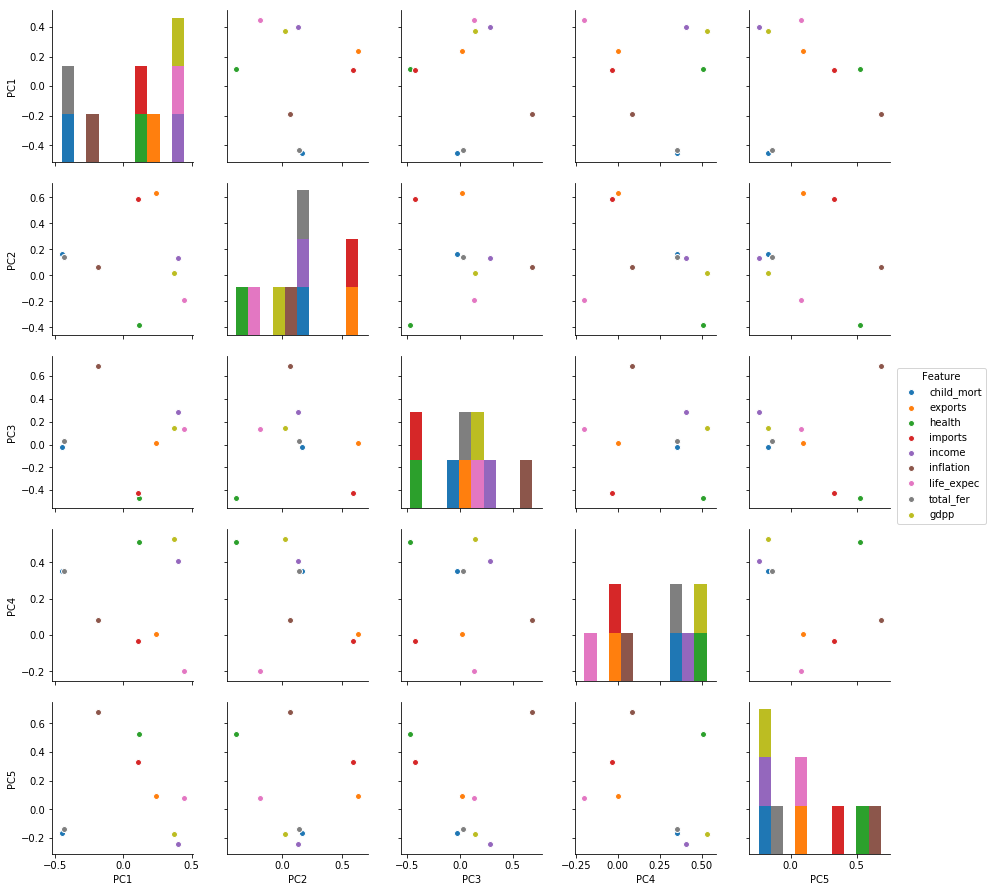

In [22]:
plt.figure(figsize=(10,10))
sns.pairplot(pcs_df, hue='Feature')

We observe that the first principal component is in the direction where the Life Expectancy, Health, Income and GDPP is the highest, where as the second principal component is highest in the direction where imports and exports is higher

#### Looking at the screeplot to assess the number of needed principal components

In [23]:
pca.explained_variance_ratio_

array([0.44528982, 0.16833059, 0.13848132, 0.11207932, 0.07737202,
       0.02683043, 0.01350575, 0.01044542, 0.00766533])

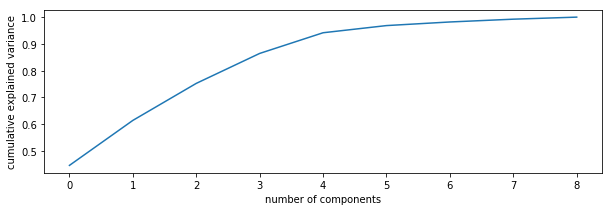

In [24]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (10,3))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

We observe that close to 5 principal components are able to explain approximately 95% of variance

However, let's take a different approach to identify the number of components to take. <br>Let's identify the **number of components that can explain 90% of the data**

In [25]:
pca_again = PCA(0.90)

In [26]:
pca_again

PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

Now apply the principal component transformation on our original dataset

In [27]:
country_pca2 = pca_again.fit_transform(country_attr)
country_pca2.shape

(159, 5)

In [28]:
country_pca2

array([[-2.81737199e+00, -1.57089469e-01, -5.66713865e-01,
         9.56437531e-01, -1.53635839e-01],
       [ 6.58160613e-01, -5.86164664e-01, -3.48681687e-01,
        -1.05999211e+00,  1.76969765e-01],
       [-2.66068462e-02, -1.84322126e-01,  1.19352268e+00,
        -9.31786450e-01,  7.66204602e-02],
       [-2.87237873e+00,  1.84559466e+00,  1.28829940e+00,
         6.11345659e-01, -2.65040727e-01],
       [ 1.20124860e+00,  2.01498273e-01, -4.09838632e-01,
        -7.21338593e-01, -1.23670038e-01],
       [ 3.08203712e-01, -1.56726873e+00,  1.21186045e+00,
        -6.99651487e-02,  8.28592567e-01],
       [ 1.70303179e-01, -4.60889516e-01,  1.86838506e-01,
        -1.43224223e+00, -8.17342060e-02],
       [ 2.57299979e+00, -1.64844385e+00,  4.83826776e-01,
         1.23588719e+00, -7.94476194e-01],
       [ 3.07118364e+00, -5.93966901e-01, -4.25537363e-01,
         1.42739134e+00,  1.53347183e-01],
       [ 4.25562706e-02, -1.92034706e-01,  8.67256520e-01,
        -4.65546900e-01

In [29]:
#Creating a transpose so that the each column is properly arranged
pc = np.transpose(country_pca2)

We see that the PCA select 5 components that explain a total variance of 90%

In [30]:
pcs_df2 = pd.DataFrame({'PC1':pc[0],'PC2':pc[1], 'PC3':pc[2], 'PC4':pc[3], 'PC5':pc[4]})

In [31]:
pcs_df2.head()

,PC1,PC2,PC3,PC4,PC5
0,-2.817372,-0.157089,-0.566714,0.956438,-0.153636
1,0.658161,-0.586165,-0.348682,-1.059992,0.176970
2,-0.026607,-0.184322,1.193523,-0.931786,0.076620
3,-2.872379,1.845595,1.288299,0.611346,-0.265041
4,1.201249,0.201498,-0.409839,-0.721339,-0.123670


In [32]:
pcs_df2.shape

(159, 5)

Let's have a look at the **correlation matrix of the principal components** to see if we have tackled the problem of multicollinearity

In [33]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(country_pca2.transpose())

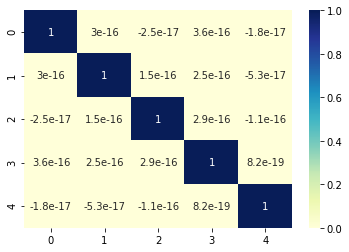

In [34]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (6,4))
sns.heatmap(corrmat,annot = True, cmap="YlGnBu")

We can now see that we have dealt with the issue of multicollinearity as the correlation between all principal components is nearly 0

Now that we have performed PCA to remove multicollinearity and still kept 90% of variance in the data intact, let's go ahead with the process of clustering based on the PCA components

### Model Building: Kmeans Clustering

#### Hopkins Statistic

The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.

- If the value is between {0.01, ...,0.3}, the data is regularly spaced.

- If the value is around 0.5, it is random.

- If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [35]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [36]:
#Let's check the Hopkins measure
hopkins(pcs_df2)

0.7671456821320269

Since the value is > 0.7, the given dataset has a good tendency to form clusters.

#### Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$
* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [37]:
#First we'll do the silhouette score analysis
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(pcs_df2)
    sse_.append([k, silhouette_score(pcs_df2, kmeans.labels_)])

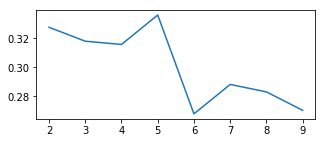

In [38]:
plt.figure(figsize = (5,2))
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

From the above analysis we find that 4 seems to be a good number of clusters for K means algorithm

#### Elbow Curve Analysis (Sum of Squared Distances)

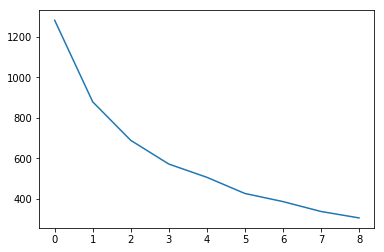

In [39]:
#Now let's proceed to the elbow curve method
ssd = []
for num_clusters in list(range(1,10)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(pcs_df2)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

Here, we're seeing a reasonable bend at around 4 clusters. Hence it seems a good K to choose. Let's go ahead with k-means clustering for the above Principal components based on the k=4

In [40]:
pcs_df2.head()

,PC1,PC2,PC3,PC4,PC5
0,-2.817372,-0.157089,-0.566714,0.956438,-0.153636
1,0.658161,-0.586165,-0.348682,-1.059992,0.176970
2,-0.026607,-0.184322,1.193523,-0.931786,0.076620
3,-2.872379,1.845595,1.288299,0.611346,-0.265041
4,1.201249,0.201498,-0.409839,-0.721339,-0.123670


**Performing Kmeans with k=4**

In [41]:
#Let's perform K means using K=4
model_clus2 = KMeans(n_clusters = 4, max_iter=50,random_state = 50)
model_clus2.fit(pcs_df2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=50, tol=0.0001, verbose=0)

In [42]:
dat4=pcs_df2
dat4.index = pd.RangeIndex(len(dat4.index))
dat_km = pd.concat([dat4, pd.Series(model_clus2.labels_)], axis=1)
dat_km.columns = ['PC1', 'PC2','PC3','PC4','PC5','ClusterID']
dat_km.head()

,PC1,PC2,PC3,PC4,PC5,ClusterID
0,-2.817372,-0.157089,-0.566714,0.956438,-0.153636,0
1,0.658161,-0.586165,-0.348682,-1.059992,0.176970,1
2,-0.026607,-0.184322,1.193523,-0.931786,0.076620,1
3,-2.872379,1.845595,1.288299,0.611346,-0.265041,0
4,1.201249,0.201498,-0.409839,-0.721339,-0.123670,1


#### Let's visualize the clusters that have been formed in 2-D format

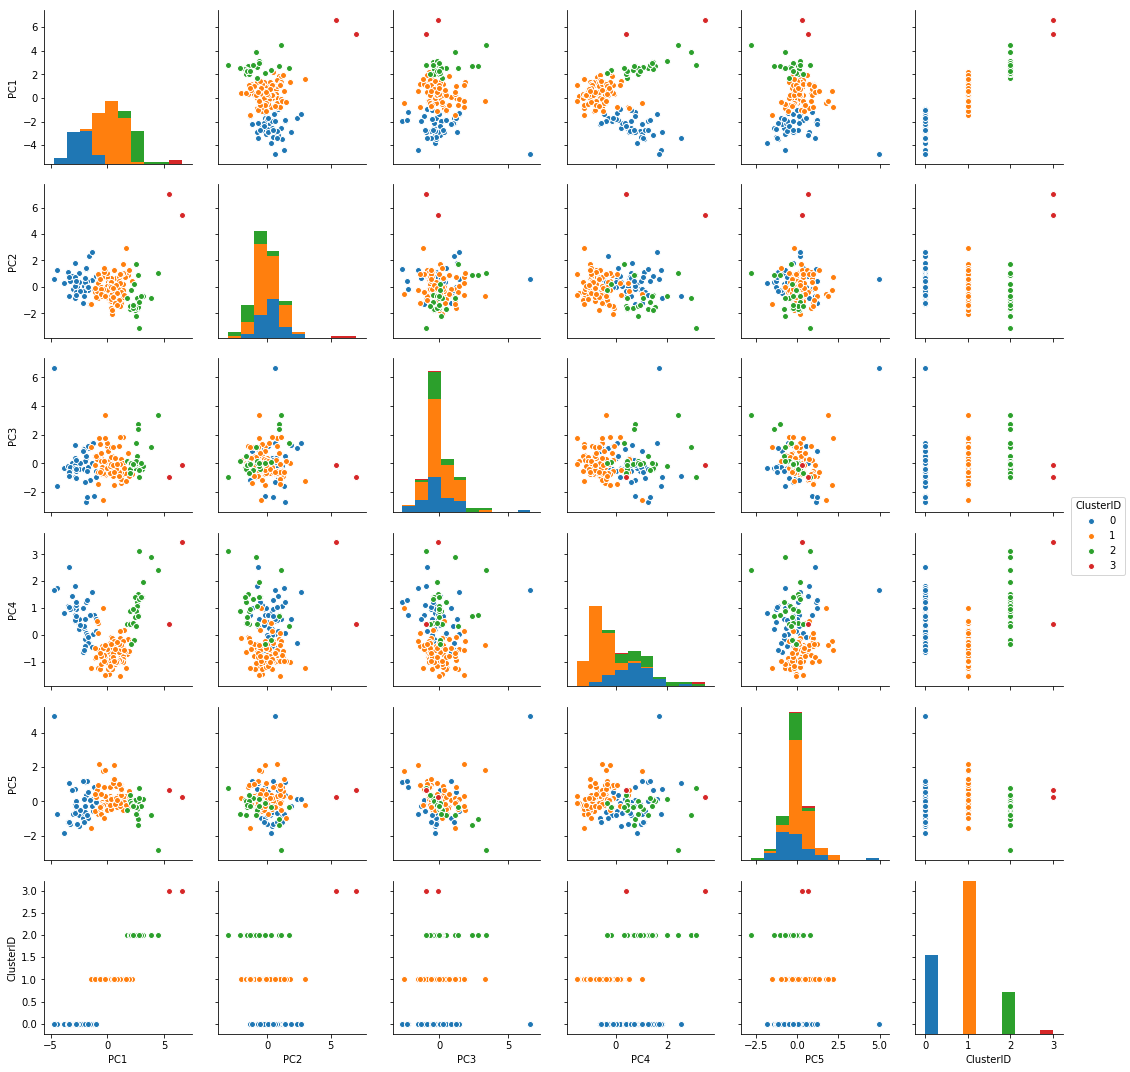

In [43]:
sns.pairplot(data=dat_km, hue='ClusterID')

### Analysis of the Clusters

Let's have a look at each of the cluster's description in terms of the principal components

In [44]:
dat_km.head()
cluster_info = pd.pivot_table(data=dat_km, index='ClusterID', values=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'], aggfunc=np.mean)

In [45]:
cluster_info['ClusterID']=cluster_info.index

In [46]:
cluster_info

,PC1,PC2,PC3,PC4,PC5,ClusterID
ClusterID,,,,,,
0,-2.397803,0.309791,-0.061769,0.625198,-0.165221,0
1,0.375939,-0.067540,-0.050141,-0.661201,0.173012,1
2,2.617035,-0.851071,0.344317,1.091636,-0.363026,2
3,6.004834,6.214299,-0.535785,1.926277,0.461249,3


Visualising the clusters based on principal components

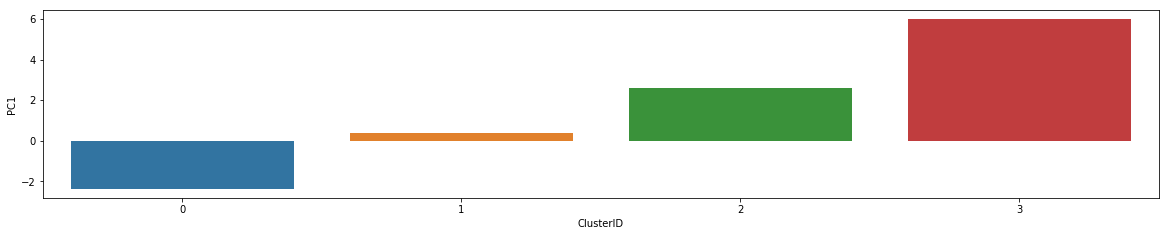

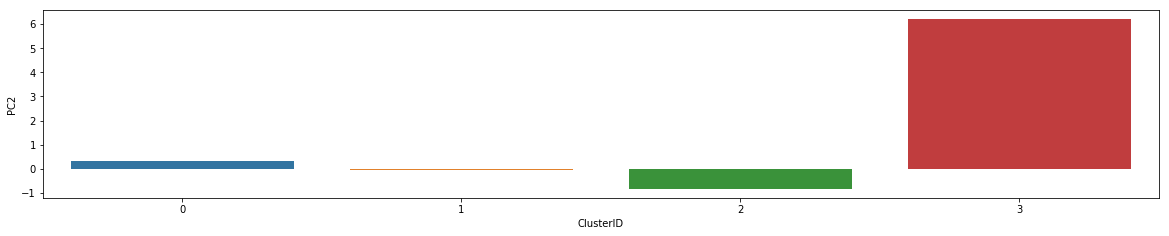

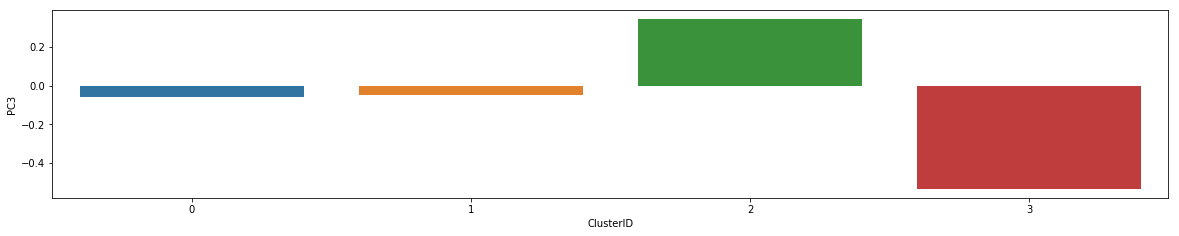

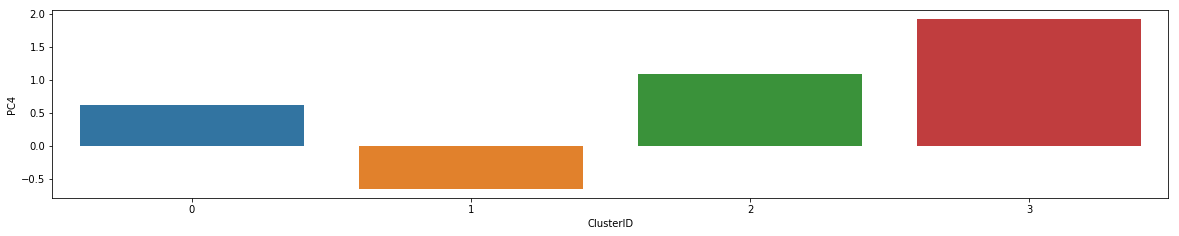

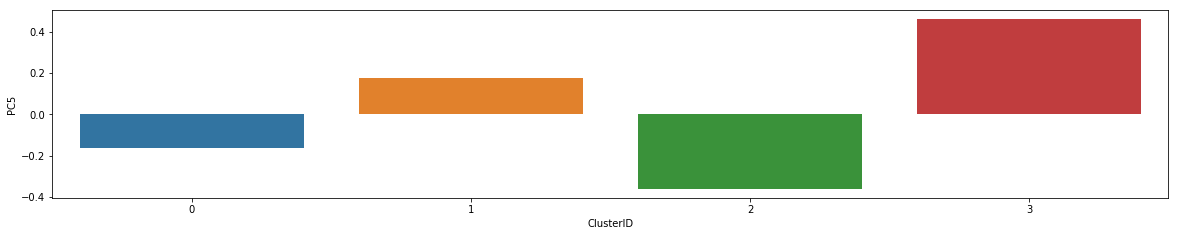

In [47]:
#plotting barplot
plt.figure(figsize=(20,20))
plt.subplot(5,1,1)
sns.barplot(cluster_info.ClusterID, cluster_info.PC1)
plt.show()

plt.figure(figsize=(20, 20))
plt.subplot(5,1,2)
sns.barplot(cluster_info.ClusterID, cluster_info.PC2)
plt.show()

plt.figure(figsize=(20, 20))
plt.subplot(5,1,2)
sns.barplot(cluster_info.ClusterID, cluster_info.PC3)
plt.show()

plt.figure(figsize=(20, 20))
plt.subplot(5,1,2)
sns.barplot(cluster_info.ClusterID, cluster_info.PC4)
plt.show()

plt.figure(figsize=(20, 20))
plt.subplot(5,1,2)
sns.barplot(cluster_info.ClusterID, cluster_info.PC5)
plt.show()

Looking at the different means of all the components within the different cluster, we observe the following trend:
- Cluster 1 has a higher mean for PC4 and a low mean for PC1, PC5
- Cluster 2 has a higher mean for PC5 and a low mean for PC4
- Cluster 3 has a higher mean for PC1,PC3,PC4 and a low mean for PC5
- Cluster 4 has a higher mean for PC1, PC2, PC4, PC5 and a low mean for PC3

Let's compare the above with the explanations that we have for each principal component:

In [48]:
pcs_df

,PC1,PC2,PC3,PC4,PC5,Feature
0,-0.449226,0.165388,-0.025861,0.352078,-0.167454,child_mort
1,0.238558,0.633006,0.016773,0.003308,0.095679,exports
2,0.114406,-0.384101,-0.470451,0.509405,0.525977,health
3,0.106642,0.589623,-0.428864,-0.036155,0.327517,imports
4,0.398821,0.131050,0.284971,0.406727,-0.241830,income
5,-0.188371,0.067609,0.687828,0.084272,0.681567,inflation
6,0.444907,-0.188198,0.134951,-0.199000,0.081739,life_expec
7,-0.431276,0.138254,0.030663,0.351368,-0.138519,total_fer
8,0.371943,0.021990,0.142594,0.528809,-0.173209,gdpp


Countries with dire need of money are those that would be falling in the cluster where child mortality is high, exports are low, health is low, imports are high, income is low, inflation is high, life expectany is low, total fertility is high and gdp per capita is low.

**Now that we have performed clustering on the principal components, let's join the dataset with the original features**

In [49]:
country_refined2.shape

(159, 10)

In [50]:
dat_km.shape

(159, 6)

In [51]:
dat5=pd.merge(country_refined2,dat_km, left_index=True,right_index=True)
dat5.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,PC5,ClusterID
0,Afghanistan,1.287660,-1.134867,0.278251,-0.082208,-0.805822,0.156864,-1.614237,1.897176,-0.677143,-2.817372,-0.157089,-0.566714,0.956438,-0.153636,0
1,Albania,-0.537333,-0.478220,-0.096725,0.070624,-0.374243,-0.311411,0.645924,-0.857394,-0.484167,0.658161,-0.586165,-0.348682,-1.059992,0.176970,1
2,Algeria,-0.272015,-0.098824,-0.963176,-0.639838,-0.220182,0.786908,0.668413,-0.038289,-0.463980,-0.026607,-0.184322,1.193523,-0.931786,0.076620,1
3,Angola,2.001787,0.773056,-1.443729,-0.164820,-0.583289,1.382894,-1.175698,2.121770,-0.514720,-2.872379,1.845595,1.288299,0.611346,-0.265041,0
4,Antigua and Barbuda,-0.693548,0.160186,-0.286034,0.496076,0.101427,-0.599944,0.702147,-0.540321,-0.041692,1.201249,0.201498,-0.409839,-0.721339,-0.123670,1


Now that we have a cluster id corresponding to each of the country, let's drop the principal components from the dataset

In [52]:
dat5.drop(['PC1','PC2','PC3','PC4','PC5'], axis=1, inplace=True)

In [53]:
dat5.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,1.287660,-1.134867,0.278251,-0.082208,-0.805822,0.156864,-1.614237,1.897176,-0.677143,0
1,Albania,-0.537333,-0.478220,-0.096725,0.070624,-0.374243,-0.311411,0.645924,-0.857394,-0.484167,1
2,Algeria,-0.272015,-0.098824,-0.963176,-0.639838,-0.220182,0.786908,0.668413,-0.038289,-0.463980,1
3,Angola,2.001787,0.773056,-1.443729,-0.164820,-0.583289,1.382894,-1.175698,2.121770,-0.514720,0
4,Antigua and Barbuda,-0.693548,0.160186,-0.286034,0.496076,0.101427,-0.599944,0.702147,-0.540321,-0.041692,1


So we have performed the clustering using the PCs and have now allocated the clusterIDs back to each of the datapoints

**Analyzing the clusters in the combined dataset using our original features**

In [54]:
cluster_info = pd.pivot_table(data=dat5, index='ClusterID', values=['child_mort','exports','health','imports','income',
                                                                    'inflation','life_expec','total_fer','gdpp'],
                              aggfunc=np.mean)

In [55]:
cluster_info['ClusterID']=cluster_info.index

In [56]:
cluster_info

,child_mort,exports,gdpp,health,imports,income,inflation,life_expec,total_fer,ClusterID
ClusterID,,,,,,,,,,
0,0.096151,-0.045589,-0.046131,0.037561,0.031258,-0.086850,-0.126184,-0.106441,0.093674,0
1,0.028967,-0.047657,-0.086909,-0.226167,-0.073182,-0.011368,0.065413,-0.004318,-0.024752,1
2,0.018720,-0.174552,-0.052904,0.192698,-0.125579,-0.123877,-0.037009,-0.077946,0.103458,2
3,0.352847,-0.246570,-0.171897,0.447537,0.657169,0.306323,0.336133,-0.292999,0.688336,3


Visualising the clusters based on the original variables

Text(0.5,1,'Cluster4')

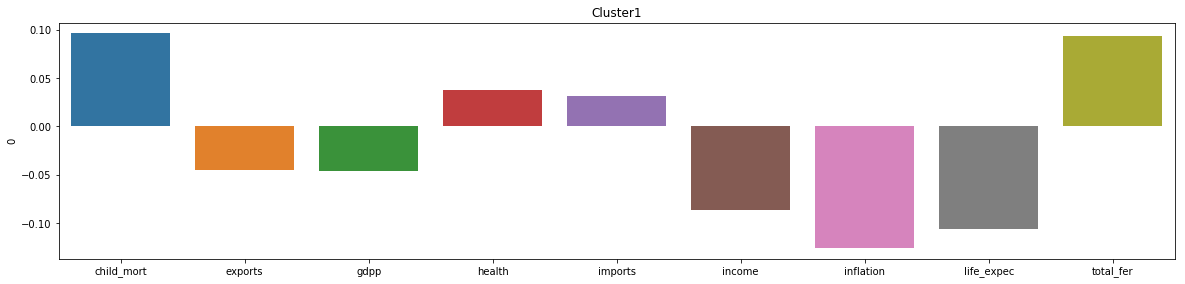

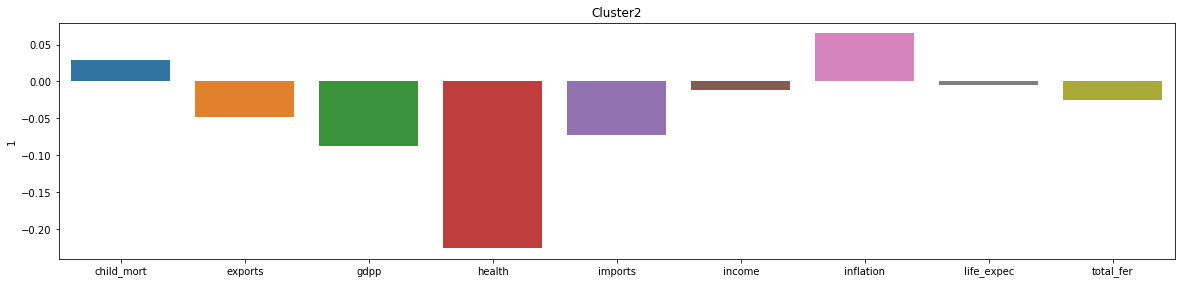

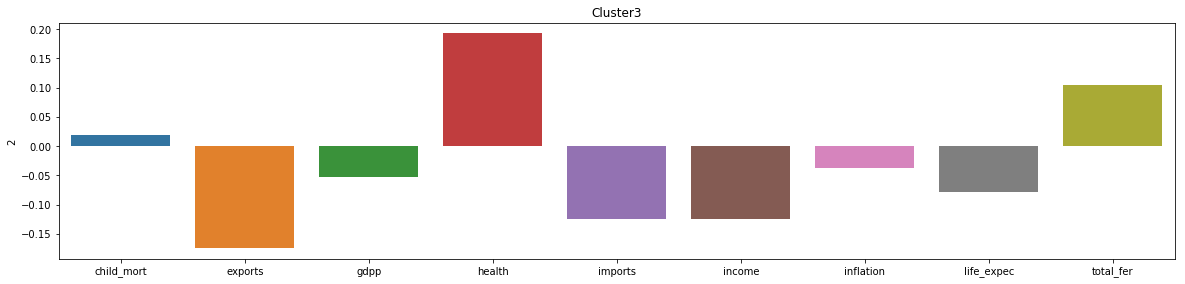

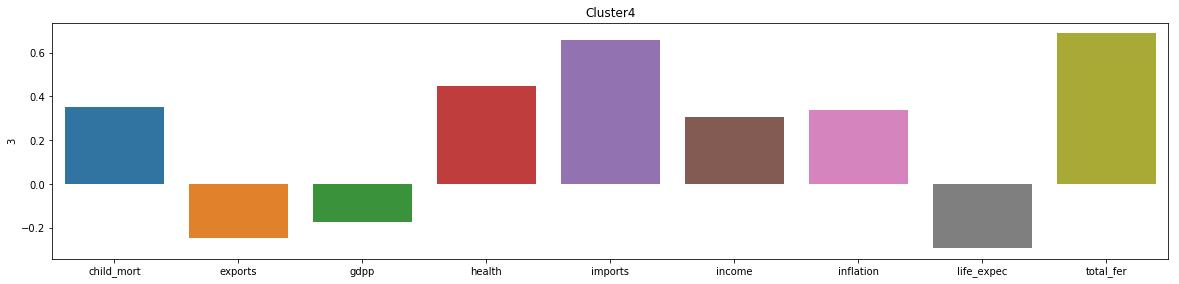

In [57]:
#clus0 = cluster_info.loc[0]
#cluster_info.columns
plt.figure(figsize=(20, 20))
plt.subplot(4,1,1)
sns.barplot(cluster_info.columns[0:9], cluster_info.loc[0][0:9])
plt.title('Cluster1')

plt.figure(figsize=(20, 20))
plt.subplot(4,1,1)
sns.barplot(cluster_info.columns[0:9], cluster_info.loc[1][0:9])
plt.title('Cluster2')

plt.figure(figsize=(20, 20))
plt.subplot(4,1,1)
sns.barplot(cluster_info.columns[0:9], cluster_info.loc[2][0:9])
plt.title('Cluster3')

plt.figure(figsize=(20, 20))
plt.subplot(4,1,1)
sns.barplot(cluster_info.columns[0:9], cluster_info.loc[3][0:9])
plt.title('Cluster4')


Use binning based on the findings from the cluster means to identify the countries in the most dire need of funding

In [58]:
dat5.loc[(dat5['inflation']<-0.12) & (dat5['health']<=-0.22) & (dat5['life_expec']<=-0.29) &(dat5['income']<=-0.12)
         &(dat5['gdpp']<=-0.17)&(dat5['child_mort']>=0.096)&(dat5['total_fer']>=0.068)&
         (dat5['exports']<=-0.24),:].sort_values(by = ['income'])['country']

112                       Niger
31     Central African Republic
36                      Comoros
56                       Gambia
17                        Benin
97                         Mali
129                     Senegal
80                        Kenya
28                     Cameroon
Name: country, dtype: object

Based on the clusters created using Kmeans and then using the concept of binning based on the means of the different clusters, the top countries identified that are in dire need of funding include:<br>
**Niger, Central African Republic, Comoros, Gambia, Benin, Mali, Senegal, Kenya, Cameroon**

<br>

Let's perform the above analysis using Hierarchical Clustering instead of Kmeans

### Hierarchical Clustering

In [59]:
pcs_df2.head()

,PC1,PC2,PC3,PC4,PC5
0,-2.817372,-0.157089,-0.566714,0.956438,-0.153636
1,0.658161,-0.586165,-0.348682,-1.059992,0.176970
2,-0.026607,-0.184322,1.193523,-0.931786,0.076620
3,-2.872379,1.845595,1.288299,0.611346,-0.265041
4,1.201249,0.201498,-0.409839,-0.721339,-0.123670


Perform hierarchical clustering using the 'complete' method

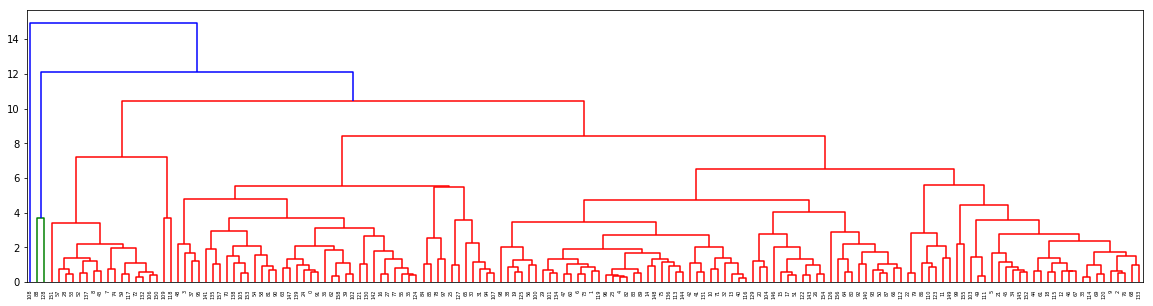

In [60]:
# heirarchical clustering
plt.figure(figsize=(20, 5))
mergings = linkage(pcs_df2, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

Based on our initial hopkins statistic and silhouette analysis, choose number of clusters as 4 and proceed with cutting the dendrogram at that point to form the clusters 

In [61]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 4).reshape(-1,))
data_hc = pd.concat([pcs_df2, clusterCut], axis=1)
data_hc.columns = ['PC1','PC2','PC3','PC4','PC5','ClusterID']
#RFM_hc.columns = ['CustomerID', 'Frequency', 'Amount', 'Recency', 'ClusterID']

In [62]:
data_hc.head()

,PC1,PC2,PC3,PC4,PC5,ClusterID
0,-2.817372,-0.157089,-0.566714,0.956438,-0.153636,0
1,0.658161,-0.586165,-0.348682,-1.059992,0.176970,0
2,-0.026607,-0.184322,1.193523,-0.931786,0.076620,0
3,-2.872379,1.845595,1.288299,0.611346,-0.265041,0
4,1.201249,0.201498,-0.409839,-0.721339,-0.123670,0


In [63]:
# Append the original dataset to assign the cluster to the countries and the original features
dat6=pd.merge(country_refined2,data_hc, left_index=True,right_index=True)
dat6.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,PC5,ClusterID
0,Afghanistan,1.287660,-1.134867,0.278251,-0.082208,-0.805822,0.156864,-1.614237,1.897176,-0.677143,-2.817372,-0.157089,-0.566714,0.956438,-0.153636,0
1,Albania,-0.537333,-0.478220,-0.096725,0.070624,-0.374243,-0.311411,0.645924,-0.857394,-0.484167,0.658161,-0.586165,-0.348682,-1.059992,0.176970,0
2,Algeria,-0.272015,-0.098824,-0.963176,-0.639838,-0.220182,0.786908,0.668413,-0.038289,-0.463980,-0.026607,-0.184322,1.193523,-0.931786,0.076620,0
3,Angola,2.001787,0.773056,-1.443729,-0.164820,-0.583289,1.382894,-1.175698,2.121770,-0.514720,-2.872379,1.845595,1.288299,0.611346,-0.265041,0
4,Antigua and Barbuda,-0.693548,0.160186,-0.286034,0.496076,0.101427,-0.599944,0.702147,-0.540321,-0.041692,1.201249,0.201498,-0.409839,-0.721339,-0.123670,0


In [64]:
# Dropping the principal components from the data
dat6.drop(['PC1','PC2','PC3','PC4','PC5'], axis=1, inplace=True)

In [65]:
dat6.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,1.287660,-1.134867,0.278251,-0.082208,-0.805822,0.156864,-1.614237,1.897176,-0.677143,0
1,Albania,-0.537333,-0.478220,-0.096725,0.070624,-0.374243,-0.311411,0.645924,-0.857394,-0.484167,0
2,Algeria,-0.272015,-0.098824,-0.963176,-0.639838,-0.220182,0.786908,0.668413,-0.038289,-0.463980,0
3,Angola,2.001787,0.773056,-1.443729,-0.164820,-0.583289,1.382894,-1.175698,2.121770,-0.514720,0
4,Antigua and Barbuda,-0.693548,0.160186,-0.286034,0.496076,0.101427,-0.599944,0.702147,-0.540321,-0.041692,0


**Analyzing the clusters created**

In [66]:
cluster_info_hc = pd.pivot_table(data=dat6, index='ClusterID', values=['child_mort','exports','health','imports','income',
                                                                    'inflation','life_expec','total_fer','gdpp'],
                              aggfunc=np.mean)

In [67]:
cluster_info_hc['ClusterID']=cluster_info_hc.index

In [68]:
cluster_info_hc

,child_mort,exports,gdpp,health,imports,income,inflation,life_expec,total_fer,ClusterID
ClusterID,,,,,,,,,,
0,0.030708,-0.056474,-0.076190,-0.132907,-0.054131,-0.036412,0.015843,-0.015777,0.004953,0
1,0.144146,-0.164327,-0.000566,0.291600,-0.061096,-0.140622,-0.155666,-0.194921,0.195846,1
2,0.352847,-0.246570,-0.171897,0.447537,0.657169,0.306323,0.336133,-0.292999,0.688336,2
3,0.439633,0.244091,-0.424152,-0.012993,0.570426,-0.450496,-0.399390,-1.344367,0.430714,3


Identifying the countries that are in the most dire need of funding based on the cluster averages for the different fetures shown above

In [69]:
#dat5.loc[(dat5['inflation']<-0.12) & (dat5['health']<=-0.22) & (dat5['life_expec']<=-0.29) &(dat5['income']<=-0.12)
        # &(dat5['gdpp']<=-0.17)&(dat5['child_mort']>=0.35),:].sort_values(by = ['income'])[0:10]['country']
        
dat6.loc[(dat6['inflation']<-0.16)&(dat6['health']<=-0.01)&(dat6['life_expec']<=-0.29)&(dat6['income']<=-0.14)&
         (dat6['gdpp']<=-0.17)&(dat6['child_mort']>=0.43)&(dat6['total_fer']>=0.43)&
         (dat6['exports']<=-0.16),:].sort_values(by = ['income'])['country']

112                       Niger
31     Central African Republic
36                      Comoros
56                       Gambia
17                        Benin
97                         Mali
129                     Senegal
80                        Kenya
28                     Cameroon
Name: country, dtype: object

Based on the clusters created using Hierarchical Clustering and then using the concept of binning based on the means of the different clusters, the top 10 countries identified that are in dire need of funding include:<br>
**Niger, Central African Republic, Comoros, Gambia, Benin, Mali, Senegal, Kenya, Cameroon**

The countries identified across both the types of clusterings are identical

### The Final List of Countries

The final list of countries, from our analysis and modelling, that are in the most dire need of funding include:<br><br>
**Niger, Central African Republic, Comoros, Gambia, Benin, Mali, Senegal, Kenya, Cameroon**